In [97]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [98]:
#Загрузить данные в pandas по url=https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
df = pd.read_csv(url, sep='\t')

In [99]:
#1. Вывести: кол-во наблюдений в датасете
print(len(df.index))

4622


In [100]:
#2. Вывести названия столбцов
print(*df.columns, sep=', ')

order_id, quantity, item_name, choice_description, item_price


In [101]:
#3. Определить самую частую позицию (item) в заказе
print(*df.item_name.mode())

Chicken Bowl


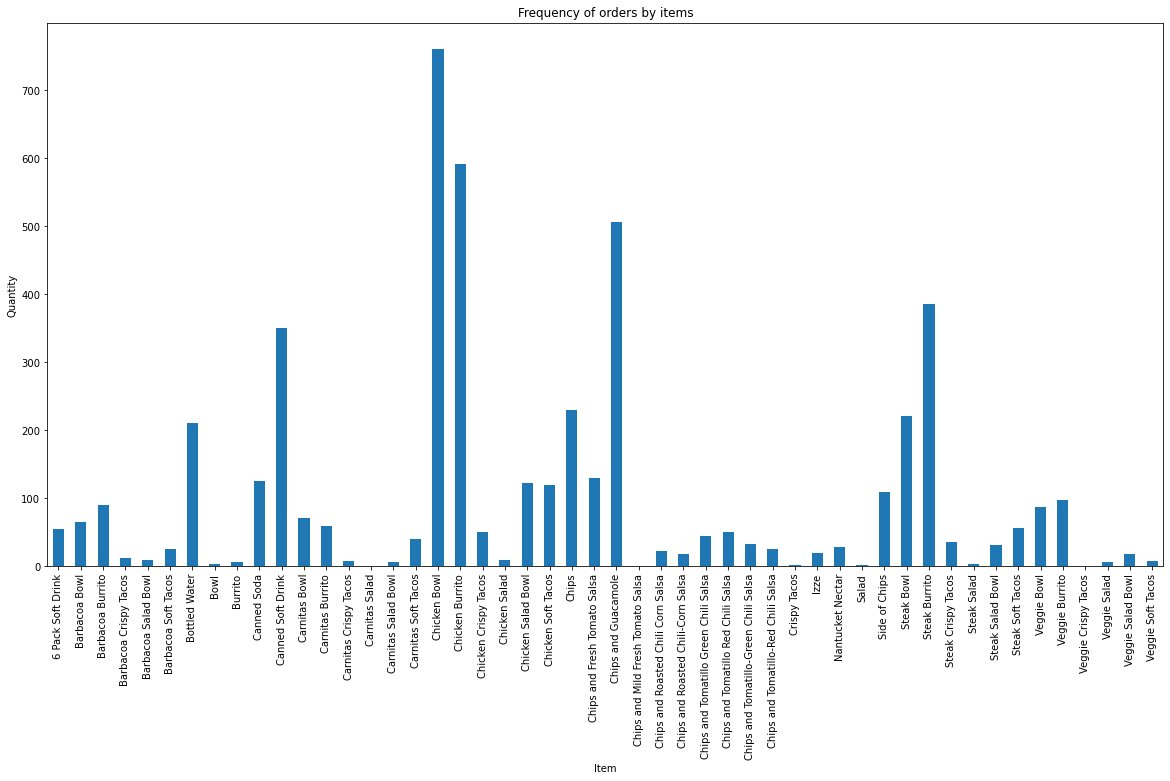

In [102]:
#4. Построить гистрограмму частоты заказов по позициям (item)
cou = df.groupby('item_name').quantity.sum()
cou.plot(kind='bar', figsize=(20,10))
plt.title('Frequency of orders by items')
plt.xlabel('Item')
plt.ylabel('Quantity')
plt.show()

In [103]:
#5. Измените тип переменной item_price c с помощью лямбды функции
df['item_price'] = df['item_price'].apply(lambda x: x.replace('$','')).astype('float')

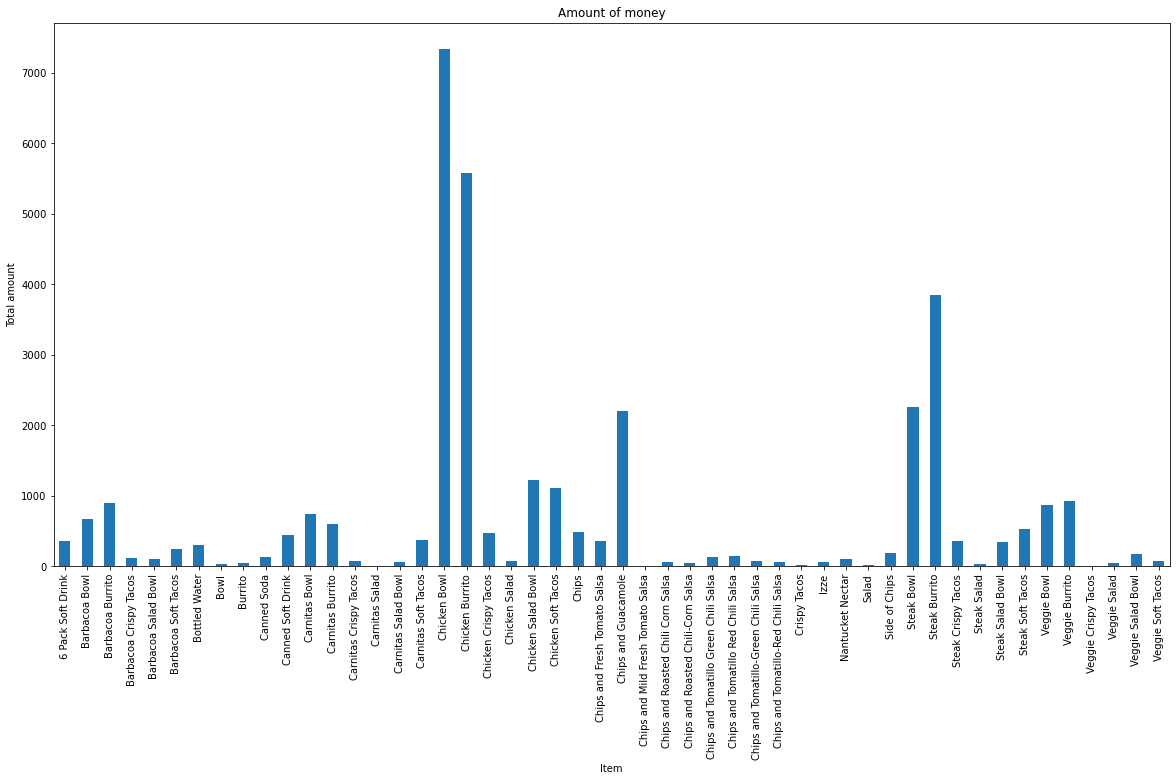

In [104]:
#6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)
cou = df.groupby('item_name').item_price.sum()
cou.plot(kind='bar', figsize=(20,10))
plt.title('Amount of money')
plt.xlabel('Item')
plt.ylabel('Total amount')
plt.show()

In [105]:
#7. Средняя сумма заказа? (минимум 2 способа)
#Первый способ:
print(round(df.groupby('order_id').item_price.sum().mean(), 2))
#Второй способ:
print(round(df.item_price.sum()/df.order_id.max(), 2))

18.81
18.81


In [106]:
#8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе
print(*df.groupby('order_id').nunique().item_name.agg(['mean','min','max','median']), sep='\n')

2.340239912758997
1.0
8.0
2.0


In [107]:
#9. Определить статистику заказов стейков, а также статистику заказов прожарки
print('Статистика заказов стейков:')
steak = df[df.item_name.str.contains('Steak')]
steak.groupby('item_name').agg({'quantity' : np.sum}).reset_index()

Статистика заказов стейков:


,item_name,quantity
0,Steak Bowl,221
1,Steak Burrito,386
2,Steak Crispy Tacos,36
3,Steak Salad,4
4,Steak Salad Bowl,31
5,Steak Soft Tacos,56


In [108]:
print('Статистика заказов степени остроты соусов:')
mild = steak[steak.choice_description.str.contains('Salsa \(Mild\)', na=False)]
medium = steak[steak.choice_description.str.contains('Salsa \(Medium\)', na=False)]
hot = steak[steak.choice_description.str.contains('Salsa \(Hot\)', na=False)]
print('Mild: ', mild.quantity.sum())
print('Medium: ', medium.quantity.sum())
print('Hot: ', hot.quantity.sum())

Статистика заказов степени остроты соусов:
Mild:  96
Medium:  115
Hot:  84


In [109]:
#10. Добавить новый столбец цен на каждую позицию в заказе в рублях
df = df.assign(item_price_rubles = round(df.item_price * 74.96, 2))
df

,order_id,quantity,item_name,choice_description,item_price,item_price_rubles
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,179.15
1,1,1,Izze,[Clementine],3.39,254.11
2,1,1,Nantucket Nectar,[Apple],3.39,254.11
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,179.15
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,1272.82
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,880.78
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,880.78
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,843.30
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,655.90


In [110]:
#11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках
print('Группировка заказов по входящим в него позициям:')
grouping_orders = df.groupby('order_id').agg({'item_name' : lambda x : list(x), 'item_price' : np.sum, 'quantity' : np.sum}).reset_index()
grouping_orders

Группировка заказов по входящим в него позициям:


,order_id,item_name,item_price,quantity
0,1,"[Chips and Fresh Tomato Salsa, Izze, Nantucket...",11.56,4
1,2,[Chicken Bowl],16.98,2
2,3,"[Chicken Bowl, Side of Chips]",12.67,2
3,4,"[Steak Burrito, Steak Soft Tacos]",21.00,2
4,5,"[Steak Burrito, Chips and Guacamole]",13.70,2
...,...,...,...,...
1829,1830,"[Steak Burrito, Veggie Burrito]",23.00,2
1830,1831,"[Carnitas Bowl, Chips, Bottled Water]",12.90,3
1831,1832,"[Chicken Soft Tacos, Chips and Guacamole]",13.20,2
1832,1833,"[Steak Burrito, Steak Burrito]",23.50,2


In [111]:
print('Группировка по стейкам во всех видах прожарках:')
print('Mild: ')
mild.groupby('item_name').agg({'quantity' : np.sum}).reset_index()

Группировка по стейкам во всех видах прожарках:
Mild: 


,item_name,quantity
0,Steak Bowl,26
1,Steak Burrito,62
2,Steak Crispy Tacos,2
3,Steak Salad,1
4,Steak Soft Tacos,5


In [112]:
print('Medium: ')
medium.groupby('item_name').agg({'quantity' : np.sum}).reset_index()

Medium: 


,item_name,quantity
0,Steak Bowl,30
1,Steak Burrito,72
2,Steak Crispy Tacos,3
3,Steak Soft Tacos,10


In [113]:
print('Hot: ')
hot.groupby('item_name').agg({'quantity' : np.sum}).reset_index()

Hot: 


,item_name,quantity
0,Steak Bowl,21
1,Steak Burrito,48
2,Steak Crispy Tacos,5
3,Steak Salad,2
4,Steak Soft Tacos,8


In [114]:
#12. Определить цену по каждой позиции в отдельности
df['unit_price'] = round(df['item_price'] / df['quantity'], 2)
chips = 2.15
df.loc[df['item_name'].str.contains('and'), 'unit_price'] =- chips
df['item_name'] = df['item_name'].str.replace('Chips and ', '')
price = df.groupby('item_name').agg({'unit_price' : lambda x : list(set(x))}).reset_index()
price

,item_name,unit_price
0,6 Pack Soft Drink,[6.49]
1,Barbacoa Bowl,"[11.48, 9.25, 11.75, 8.69, 8.99, 11.49]"
2,Barbacoa Burrito,"[11.48, 9.25, 11.75, 8.69, 11.08, 8.99]"
3,Barbacoa Crispy Tacos,"[9.25, 11.48, 11.75, 8.99]"
4,Barbacoa Salad Bowl,"[9.39, 11.89]"
5,Barbacoa Soft Tacos,"[9.25, 11.48, 11.75, 8.99]"
6,Bottled Water,"[1.09, 1.5]"
7,Bowl,[7.4]
8,Burrito,[7.4]
9,Canned Soda,[1.09]
